In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart_disease.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease/heart_disease.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
df.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [6]:
for i in df.columns.tolist():
    if str(df[i].dtype) == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)

In [7]:
df.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [14]:
scale = StandardScaler()
for i in df.select_dtypes('number').columns.tolist():
    df[i] = scale.fit_transform(df[i].values.reshape(-1,1))

In [26]:
obj = df.drop(columns='Heart Disease Status').select_dtypes('object').columns.tolist()
data_encoded = pd.get_dummies(df, columns=obj, dtype=int)

In [27]:
data_encoded.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,...,High LDL Cholesterol_Yes,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium
0,0.369013,0.184687,-1.618673,-0.648537,0.366608,1.049638,0.000000,1.268241,-0.015981,No,...,0,1,0,0,0,0,1,0,0,1
1,1.084610,-0.214051,1.392253,-0.611995,1.001022,-1.354053,1.564630,0.434477,1.584346,No,...,0,0,0,1,1,0,0,0,0,1
2,-0.181446,-1.353302,-0.216639,0.123523,-1.456890,1.636184,-1.194650,1.208400,-0.283718,No,...,1,0,1,0,0,1,0,0,1,0
3,-0.952088,-1.581152,1.553142,-0.785225,-0.994866,0.486093,-1.109749,1.162067,-1.503702,No,...,1,0,1,0,1,0,0,1,0,0
4,0.589197,0.925201,0.380949,-1.363682,0.022641,0.141066,1.437278,0.671158,-0.996180,No,...,0,0,1,0,1,0,0,1,0,0


In [28]:
data_encoded['Heart Disease Status'] = data_encoded['Heart Disease Status'].apply(lambda a: 1 if a=='Yes' else 0)

In [29]:
data_encoded.columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level', 'Heart Disease Status', 'Gender_Female',
       'Gender_Male', 'Exercise Habits_High', 'Exercise Habits_Low',
       'Exercise Habits_Medium', 'Smoking_No', 'Smoking_Yes',
       'Family Heart Disease_No', 'Family Heart Disease_Yes', 'Diabetes_No',
       'Diabetes_Yes', 'High Blood Pressure_No', 'High Blood Pressure_Yes',
       'Low HDL Cholesterol_No', 'Low HDL Cholesterol_Yes',
       'High LDL Cholesterol_No', 'High LDL Cholesterol_Yes',
       'Alcohol Consumption_High', 'Alcohol Consumption_Low',
       'Alcohol Consumption_Medium', 'Stress Level_High', 'Stress Level_Low',
       'Stress Level_Medium', 'Sugar Consumption_High',
       'Sugar Consumption_Low', 'Sugar Consumption_Medium'],
      dtype='object')

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
data_encoded['Heart Disease Status'].value_counts()

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64

In [34]:
df.groupby('Gender')['Heart Disease Status'].value_counts()

Gender  Heart Disease Status
Female  No                      3948
        Yes                     1030
Male    No                      4052
        Yes                      970
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x = data_encoded.drop(columns= 'Heart Disease Status')
y = data_encoded['Heart Disease Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y )
r = range(1,10)
train_score = []
test_score = []
for i in r:
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train, y_train)
    train_score.append(kn.score(x_train,y_train))
    test_score.append(kn.score(x_test,y_test))
    

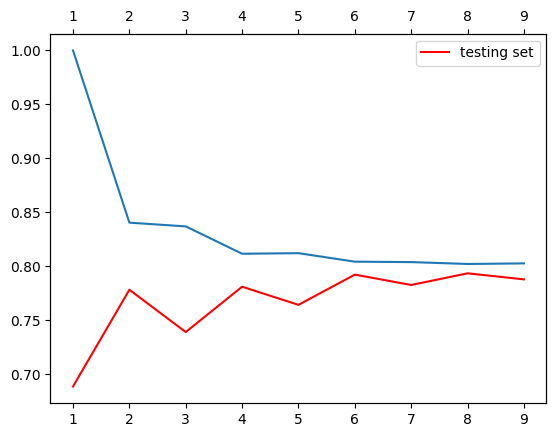

In [50]:
fig, ax = plt.subplots()
ax1 = ax.twiny()
ax.plot(r, train_score, label='training set')
ax1.plot(r, test_score, color='r',label='testing set')
plt.legend()


In [51]:
kn = KNeighborsClassifier(n_neighbors = 6)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = kn.predict(x_test)

print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      2463
           1       0.02      0.24      0.03        37

    accuracy                           0.79      2500
   macro avg       0.50      0.52      0.46      2500
weighted avg       0.97      0.79      0.87      2500



In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Resampling the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Splitting resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training the KNN model
knbut n = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1008  596]
 [  49 1547]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1604
           1       0.72      0.97      0.83      1596

    accuracy                           0.80      3200
   macro avg       0.84      0.80      0.79      3200
weighted avg       0.84      0.80      0.79      3200



In [57]:
knn.score(X_test, y_test)

0.7984375